In [1]:
# 首先导入包
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.models as models
# This is for the progress bar.
from tqdm import tqdm
import seaborn as sns
import json

In [2]:
json_path="../garbage_classify_et/garbage_classify_rule.json"
with open(json_path,'r',encoding='utf8')as fp:
    json_data=json.load(fp)
    print(json_data["0"])

其他垃圾/一次性快餐盒


In [3]:
json_data

{'0': '其他垃圾/一次性快餐盒',
 '1': '其他垃圾/污损塑料',
 '2': '其他垃圾/烟蒂',
 '3': '其他垃圾/牙签',
 '4': '其他垃圾/破碎花盆及碟碗',
 '5': '其他垃圾/竹筷',
 '6': '厨余垃圾/剩饭剩菜',
 '7': '厨余垃圾/大骨头',
 '8': '厨余垃圾/水果果皮',
 '9': '厨余垃圾/水果果肉',
 '10': '厨余垃圾/茶叶渣',
 '11': '厨余垃圾/菜叶菜根',
 '12': '厨余垃圾/蛋壳',
 '13': '厨余垃圾/鱼骨',
 '14': '可回收物/充电宝',
 '15': '可回收物/包',
 '16': '可回收物/化妆品瓶',
 '17': '可回收物/塑料玩具',
 '18': '可回收物/塑料碗盆',
 '19': '可回收物/塑料衣架',
 '20': '可回收物/快递纸袋',
 '21': '可回收物/插头电线',
 '22': '可回收物/旧衣服',
 '23': '可回收物/易拉罐',
 '24': '可回收物/枕头',
 '25': '可回收物/毛绒玩具',
 '26': '可回收物/洗发水瓶',
 '27': '可回收物/玻璃杯',
 '28': '可回收物/皮鞋',
 '29': '可回收物/砧板',
 '30': '可回收物/纸板箱',
 '31': '可回收物/调料瓶',
 '32': '可回收物/酒瓶',
 '33': '可回收物/金属食品罐',
 '34': '可回收物/锅',
 '35': '可回收物/食用油桶',
 '36': '可回收物/饮料瓶',
 '37': '有害垃圾/干电池',
 '38': '有害垃圾/软膏',
 '39': '有害垃圾/过期药物'}

In [4]:
path="../garbage_classify_et/train_data/"
os.listdir(path)

['fimg_0.jpg',
 'fimg_0.txt',
 'fimg_1.jpg',
 'fimg_1.txt',
 'fimg_10.jpg',
 'fimg_10.txt',
 'fimg_100.jpg',
 'fimg_100.txt',
 'fimg_1000.jpg',
 'fimg_1000.txt',
 'fimg_1001.jpg',
 'fimg_1001.txt',
 'fimg_1002.jpg',
 'fimg_1002.txt',
 'fimg_1003.jpg',
 'fimg_1003.txt',
 'fimg_1004.jpg',
 'fimg_1004.txt',
 'fimg_1005.jpg',
 'fimg_1005.txt',
 'fimg_1006.jpg',
 'fimg_1006.txt',
 'fimg_1007.jpg',
 'fimg_1007.txt',
 'fimg_1008.jpg',
 'fimg_1008.txt',
 'fimg_1009.jpg',
 'fimg_1009.txt',
 'fimg_101.jpg',
 'fimg_101.txt',
 'fimg_1010.jpg',
 'fimg_1010.txt',
 'fimg_1011.jpg',
 'fimg_1011.txt',
 'fimg_1012.jpg',
 'fimg_1012.txt',
 'fimg_1013.jpg',
 'fimg_1013.txt',
 'fimg_1014.jpg',
 'fimg_1014.txt',
 'fimg_1015.jpg',
 'fimg_1015.txt',
 'fimg_1016.jpg',
 'fimg_1016.txt',
 'fimg_1017.jpg',
 'fimg_1017.txt',
 'fimg_1018.jpg',
 'fimg_1018.txt',
 'fimg_1019.jpg',
 'fimg_1019.txt',
 'fimg_102.jpg',
 'fimg_102.txt',
 'fimg_1020.jpg',
 'fimg_1020.txt',
 'fimg_1021.jpg',
 'fimg_1021.txt',
 'fimg_1022.jp

In [5]:
def to_dataframe(file_path,json_path):
    """
    将图片和标签转为dataframe格式方面查看分布和图片样例
    """
    combine=os.listdir(file_path)
   
    combine.sort(key=lambda x: int(x.split('.')[0].split('_')[-1]))
    imgs=[]
    labels=[]
    label_explan=[]
    with open(json_path,'r',encoding='utf8')as fp:
        json_data=json.load(fp)
    for item in combine:
        if(item.split('.')[-1]=='jpg'):
            img_path=os.path.join(file_path,item)
            
            
            imgs.append(img_path)
            label_path=os.path.join(file_path,item.split('.')[0]+'.txt')
            with open (label_path,'r') as f:
                label=int(f.read().split(',')[-1])
            label_explan.append(json_data[str(label)])
            labels.append(str(label))
            
    
    df=pd.DataFrame()

    df['img_path']=imgs
    df['label']=labels
    df['label_explain']=label_explan
    
    
    return df

In [6]:
df=to_dataframe(path,json_path)

In [7]:
df.to_csv("garbage_classify_et.csv")

In [7]:
df

,img_path,label,label_explain
0,../garbage_classify_et/train_data/fimg_0.jpg,0,其他垃圾/一次性快餐盒
1,../garbage_classify_et/train_data/fimg_1.jpg,0,其他垃圾/一次性快餐盒
2,../garbage_classify_et/train_data/fimg_2.jpg,0,其他垃圾/一次性快餐盒
3,../garbage_classify_et/train_data/fimg_3.jpg,0,其他垃圾/一次性快餐盒
4,../garbage_classify_et/train_data/fimg_4.jpg,0,其他垃圾/一次性快餐盒
...,...,...,...
4160,../garbage_classify_et/train_data/fimg_5013.jpg,32,可回收物/酒瓶
4161,../garbage_classify_et/train_data/fimg_5014.jpg,32,可回收物/酒瓶
4162,../garbage_classify_et/train_data/fimg_5015.jpg,32,可回收物/酒瓶
4163,../garbage_classify_et/train_data/fimg_5016.jpg,32,可回收物/酒瓶


In [8]:
df.describe()

,img_path,label,label_explain
count,4165,4165,4165
unique,4165,40,40
top,../garbage_classify_et/train_data/fimg_0.jpg,17,可回收物/塑料玩具
freq,1,431,431


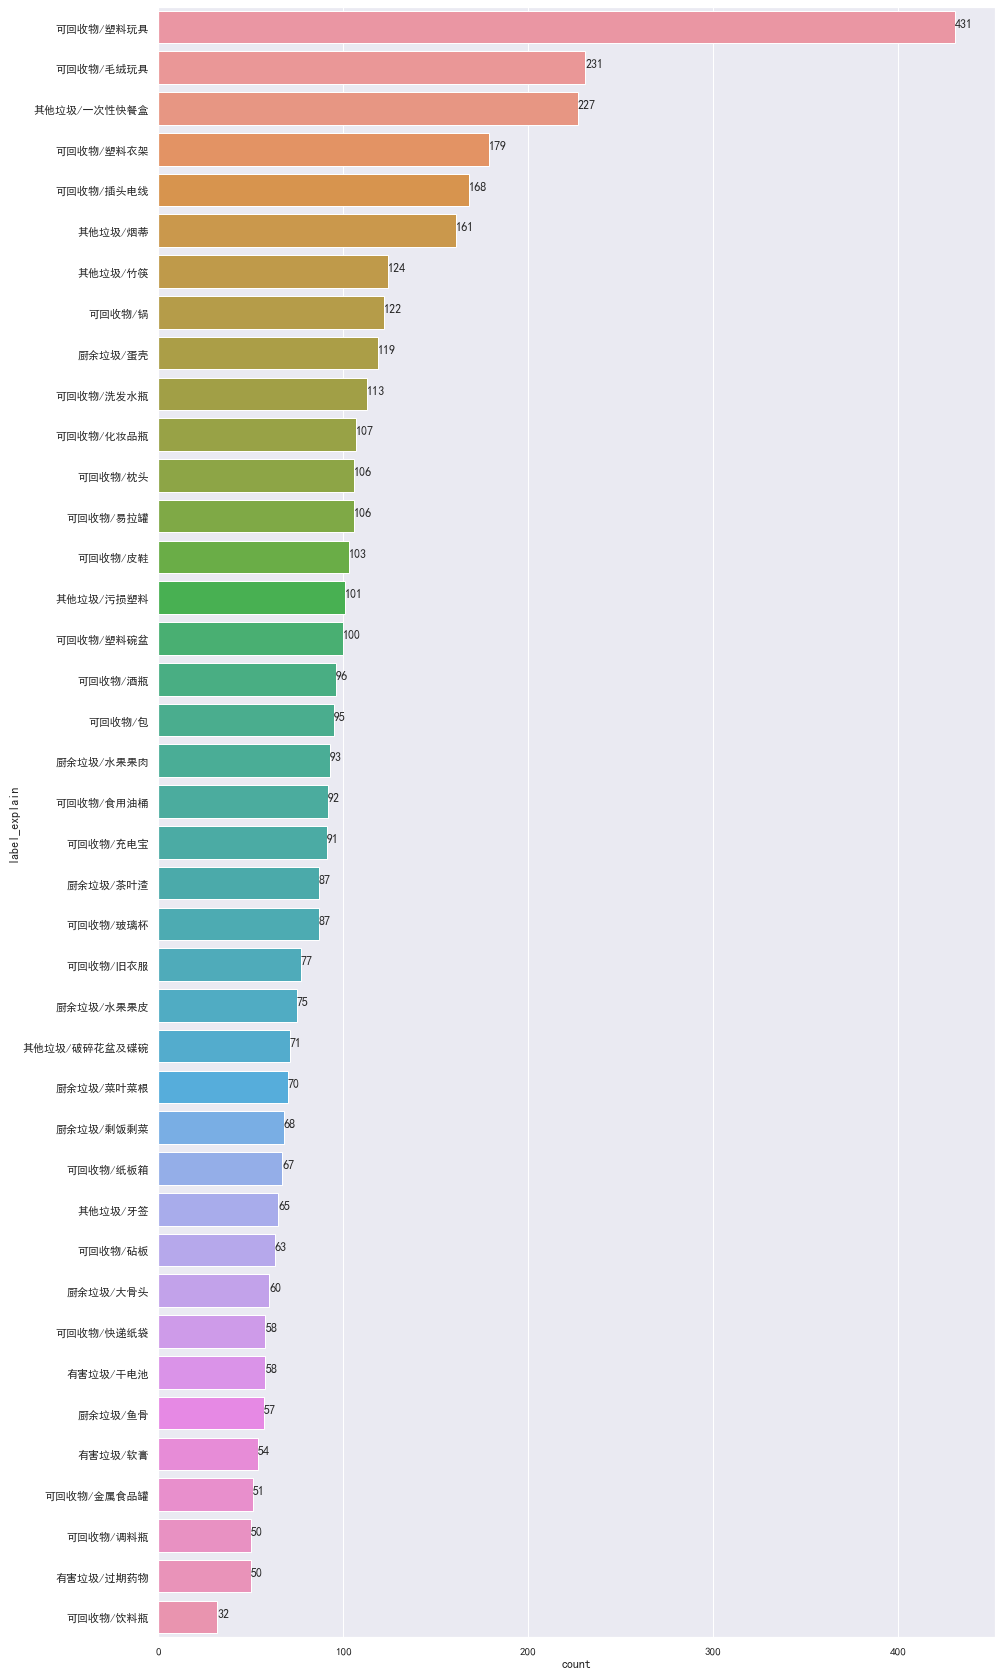

In [9]:
#解决sns无法展示中文
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=15)
sns.set(font=myfont.get_name())

def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top leaves

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=df['label_explain'],order=df['label_explain'].value_counts().index)
barw(ax0)
plt.show()

In [10]:
df['label_explain'].iloc[0]

'其他垃圾/一次性快餐盒'

In [11]:
json_path2="../garbage_classify_et/big_class.json"
with open(json_path2,'r',encoding='utf8')as fp:
    json_data=json.load(fp)
    print(json_data["可回收物"])

0


In [12]:
def big_class(old_df):
    """
    将/前的类合并 构建更粗粒度的分类标签数据集
    """
    json_path2="../garbage_classify_et/big_class.json"
    with open(json_path2,'r',encoding='utf8')as fp:
        json_data=json.load(fp)
    
    old_df['category']=old_df['label_explain'].apply(lambda x:x.split('/')[0])
    old_df['category_label']=old_df['category'].apply(lambda x:json_data[x])
    return old_df

In [13]:
df=big_class(df)

In [14]:
df[df['label']=='28']

,img_path,label,label_explain,category,category_label
3327,../garbage_classify_et/train_data/fimg_3349.jpg,28,可回收物/皮鞋,可回收物,0
3328,../garbage_classify_et/train_data/fimg_3350.jpg,28,可回收物/皮鞋,可回收物,0
3329,../garbage_classify_et/train_data/fimg_3351.jpg,28,可回收物/皮鞋,可回收物,0
3330,../garbage_classify_et/train_data/fimg_3352.jpg,28,可回收物/皮鞋,可回收物,0
3331,../garbage_classify_et/train_data/fimg_3353.jpg,28,可回收物/皮鞋,可回收物,0
...,...,...,...,...,...
3425,../garbage_classify_et/train_data/fimg_3447.jpg,28,可回收物/皮鞋,可回收物,0
3426,../garbage_classify_et/train_data/fimg_3448.jpg,28,可回收物/皮鞋,可回收物,0
3427,../garbage_classify_et/train_data/fimg_3449.jpg,28,可回收物/皮鞋,可回收物,0
3428,../garbage_classify_et/train_data/fimg_3450.jpg,28,可回收物/皮鞋,可回收物,0


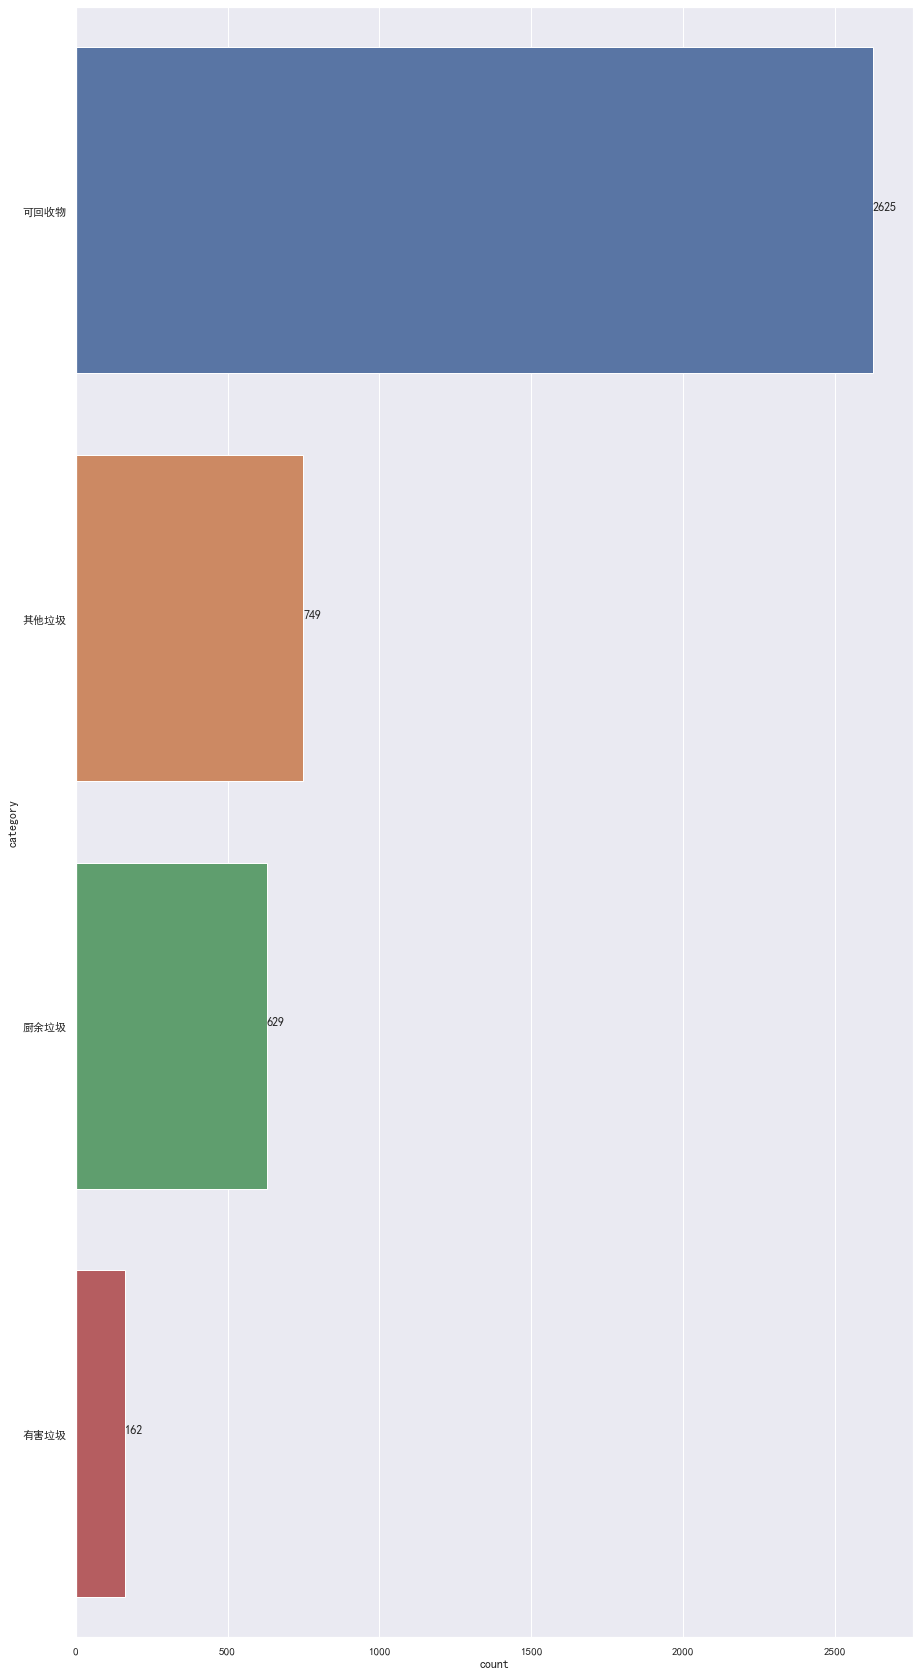

In [15]:
plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=df['category'],order=df['category'].value_counts().index)
barw(ax0)
plt.show()

In [16]:
df.to_csv("garbage_classify_et.csv")

In [17]:
df.iloc[:,-1]

0       1
1       1
2       1
3       1
4       1
       ..
4160    0
4161    0
4162    0
4163    0
4164    0
Name: category_label, Length: 4165, dtype: int64

In [29]:
df.iloc[1:4]

,img_path,label,label_explain,category,category_label
1,../garbage_classify_et/train_data/fimg_3490.jpg,29,可回收物/砧板,可回收物,0
2,../garbage_classify_et/train_data/fimg_3111.jpg,25,可回收物/毛绒玩具,可回收物,0
3,../garbage_classify_et/train_data/fimg_2997.jpg,25,可回收物/毛绒玩具,可回收物,0


In [ ]:
df['catagory']=='可回收垃圾'

In [ ]:
class GarbageData(Dataset):
    def __init__(self, csv_path, file_path, mode='train', valid_ratio=0.2, resize_height=256, resize_width=256):
        """
        csv_path:储存路径信息
        file_path:图片所在路径
        
        
        """
        self.resize_height = resize_height
        self.resize_width = resize_width

        self.file_path = file_path
        self.mode = mode
        # 读取 csv 文件
        # 利用pandas读取csv文件
        self.data_info = pd.read_csv(csv_path, header=None)  #header=None是去掉表头部分
        # 计算 length
        
        
        self.data_len = len(self.data_info.index) - 1
        self.train_len = int(self.data_len * (1 - valid_ratio))
        if mode == 'train':
            # 第一列包含图像文件的名称
            self.train_image = np.asarray(self.data_info.iloc[1:self.train_len, 1])  #self.data_info.iloc[1:,0]表示读取第一列，从第二行开始到train_len
            # 第二列是图像的 label
            self.train_label = np.asarray(self.data_info.iloc[1:self.train_len, -1])
            self.image_arr = self.train_image 
            self.label_arr = self.train_label
            
            
            
            
        elif mode == 'valid':
            self.valid_image = np.asarray(self.data_info.iloc[self.train_len:, 1])  
            self.valid_label = np.asarray(self.data_info.iloc[self.train_len:, -1])
            self.image_arr = self.valid_image
            self.label_arr = self.valid_label
        elif mode == 'test':
            self.test_image = np.asarray(self.data_info.iloc[1:, 0])
            self.image_arr = self.test_image
            
        self.real_len = len(self.image_arr)
        print('Finished reading the {} set of Leaves Dataset ({} samples found)'
              .format(mode, self.real_len))
    def __getitem__(self, index):
        
        

In [26]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [22]:
df=df.reset_index(drop=True)

In [46]:
df.head=None

In [47]:
df.iloc[np.random.choice(df.index)]

img_path          ../garbage_classify_et/train_data/fimg_1150.jpg
label                                                          10
label_explain                                            厨余垃圾/茶叶渣
category                                                     厨余垃圾
category_label                                                  2
Name: 1645, dtype: object

In [54]:
np.random.randint(4)

0

In [57]:
a=[1,2,3,4]
np.random.shuffle(a)

In [58]:
a

[2, 4, 3, 1]

In [45]:
df0

,img_path,label,label_explain,category,category_label
0,../garbage_classify_et/train_data/fimg_1316.jpg,12,厨余垃圾/蛋壳,厨余垃圾,2
1,../garbage_classify_et/train_data/fimg_3490.jpg,29,可回收物/砧板,可回收物,0
2,../garbage_classify_et/train_data/fimg_3111.jpg,25,可回收物/毛绒玩具,可回收物,0
3,../garbage_classify_et/train_data/fimg_2997.jpg,25,可回收物/毛绒玩具,可回收物,0
4,../garbage_classify_et/train_data/fimg_109.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
...,...,...,...,...,...
4160,../garbage_classify_et/train_data/fimg_2494.jpg,21,可回收物/插头电线,可回收物,0
4161,../garbage_classify_et/train_data/fimg_725.jpg,5,其他垃圾/竹筷,其他垃圾,1
4162,../garbage_classify_et/train_data/fimg_810.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
4163,../garbage_classify_et/train_data/fimg_3279.jpg,27,可回收物/玻璃杯,可回收物,0


In [34]:
class GarbageData(Dataset):
    def __init__(self, csv_path, file_path, mode='train', valid_ratio=0.2, resize_height=256, resize_width=256):
        """
        csv_path:储存路径信息
        file_path:图片所在路径
        
        
        """
        self.resize_height = resize_height
        self.resize_width = resize_width

        self.file_path = file_path
        self.mode = mode
        # 读取 csv 文件
        # 利用pandas读取csv文件
        self.data_info = pd.read_csv(csv_path, header=None)  #header=None是去掉表头部分
        # 计算 length
        
        
        self.data_len = len(self.data_info.index) - 1
        self.train_len = int(self.data_len * (1 - valid_ratio))
        if mode == 'train':
            # 第一列包含图像文件的名称
            self.train_image = np.asarray(self.data_info.iloc[1:self.train_len, 1])  #self.data_info.iloc[1:,0]表示读取第一列，从第二行开始到train_len
            # 第二列是图像的 label
            self.train_label = np.asarray(self.data_info.iloc[1:self.train_len, -1])
            self.image_arr = self.train_image 
            self.label_arr = self.train_label
        elif mode == 'valid':
            self.valid_image = np.asarray(self.data_info.iloc[self.train_len:, 1])  
            self.valid_label = np.asarray(self.data_info.iloc[self.train_len:, -1])
            self.image_arr = self.valid_image
            self.label_arr = self.valid_label
        elif mode == 'test':
            self.test_image = np.asarray(self.data_info.iloc[1:, 0])
            self.image_arr = self.test_image
            
        self.real_len = len(self.image_arr)
        print('Finished reading the {} set of Leaves Dataset ({} samples found)'
              .format(mode, self.real_len))
    def __getitem__(self, index):
        # 从 image_arr中得到索引对应的文件名
        print(self.image_arr[index])
        
        # 读取图像文件
        img_as_img = Image.open(self.image_arr[index])

        #如果需要将RGB三通道的图片转换成灰度图片可参考下面两行
#         if img_as_img.mode != 'L':
#             img_as_img = img_as_img.convert('L')

        #设置好需要转换的变量，还可以包括一系列的nomarlize等等操作
        if self.mode == 'train':
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(p=0.5),   #随机水平翻转 选择一个概率
                transforms.ToTensor()
            ])
        else:
            # valid和test不做数据增强
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor()
            ])
        
        img_as_img = transform(img_as_img)
        
        if self.mode == 'test':
            return img_as_img
        else:
            # 得到图像的 string label
            label = self.label_arr[index]
            # number label
            number_label = label
        

            return img_as_img, number_label  #返回每一个index对应的图片数据和对应的label

    def __len__(self):
        return self.real_len

In [35]:
path

'../garbage_classify_et/train_data/'

In [36]:
train_path = 'garbage_classify_et.csv'
img_path = path
train_dataset = GarbageData(train_path, img_path, mode='train')
val_dataset = GarbageData(train_path, img_path, mode='valid')
print(train_dataset)
print(val_dataset)

Finished reading the train set of Leaves Dataset (3331 samples found)
Finished reading the valid set of Leaves Dataset (834 samples found)


In [37]:
train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=8, 
        shuffle=True,
        num_workers=0
    )

val_loader = torch.utils.data.DataLoader(
        dataset=val_dataset,
        batch_size=8, 
        shuffle=True,
        num_workers=0
    )

In [38]:
dataiter = iter(val_loader)

In [44]:
inputs, classes = dataiter.next()

../garbage_classify_et/train_data/fimg_4081.jpg
../garbage_classify_et/train_data/fimg_3836.jpg
../garbage_classify_et/train_data/fimg_3613.jpg
../garbage_classify_et/train_data/fimg_3521.jpg
../garbage_classify_et/train_data/fimg_3952.jpg
../garbage_classify_et/train_data/fimg_3965.jpg
../garbage_classify_et/train_data/fimg_3399.jpg
../garbage_classify_et/train_data/fimg_3516.jpg


In [40]:
classes

('0', '0', '0', '0', '0', '0', '3', '0')

In [42]:
json_path="../garbage_classify_et/num_2_label.json"
with open(json_path,'r',encoding='utf8')as fp:
    json_data=json.load(fp)
    print(json_data["0"])

可回收物


../garbage_classify_et/train_data/fimg_3435.jpg
../garbage_classify_et/train_data/fimg_4120.jpg
../garbage_classify_et/train_data/fimg_3896.jpg
../garbage_classify_et/train_data/fimg_3677.jpg
../garbage_classify_et/train_data/fimg_3893.jpg
../garbage_classify_et/train_data/fimg_3829.jpg
../garbage_classify_et/train_data/fimg_3686.jpg
../garbage_classify_et/train_data/fimg_3629.jpg


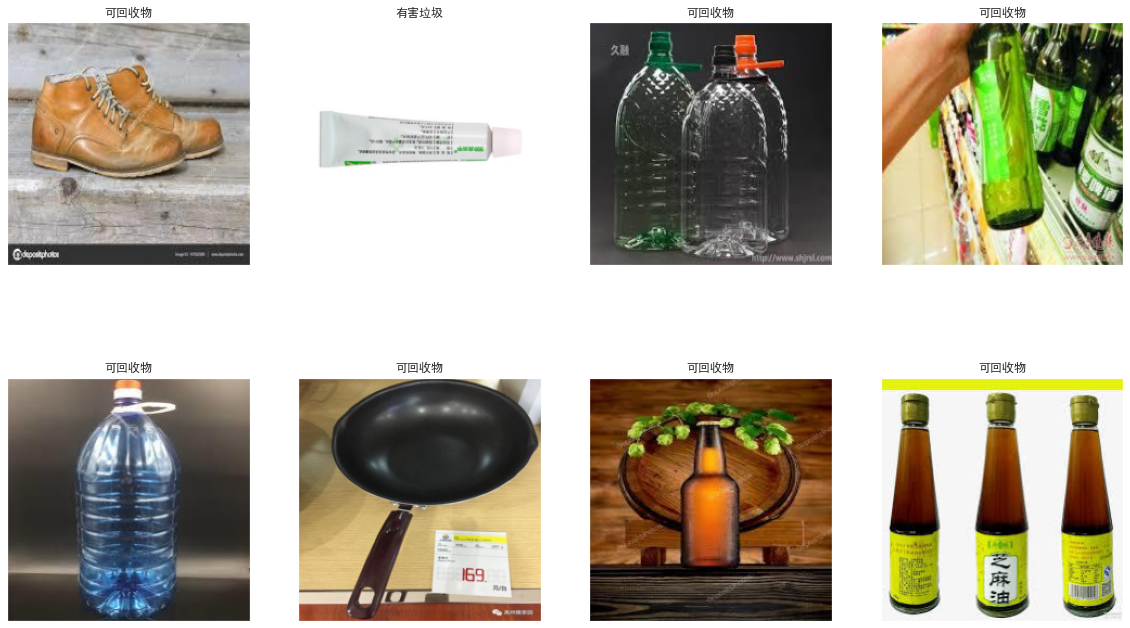

In [53]:
# 给大家展示一下数据长啥样
def im_convert(tensor):
    """ 展示数据"""
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)

    return image

fig=plt.figure(figsize=(20, 12))
columns = 4
rows = 2

dataiter = iter(val_loader)
inputs, classes = dataiter.next()

for idx in range (columns*rows):
    ax = fig.add_subplot(rows, columns, idx+1, xticks=[], yticks=[])
    ax.set_title(json_data[str(int(classes[idx]))])
    plt.imshow(im_convert(inputs[idx]))
plt.show()